## COMP 6934 Winter 2025 In class Work 4X

Using some aggregation methods with Pandas.

The dataset is the same as problem set 2 and 3, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

But I've improved the data set by removing the strange degree symbols in the column names. Get the improved data set weather.zip

If the numpy library is not aleady installed, you may need to install it.

### Credit Problem Classroom Rules

You must complete the activity in class in the time allotted. The following rules apply to the activity

* You may not use any interaction with a person or generative AI, but you must still include an attributions table indicating any use of other static or outside online resources that are were not created by you during the invigilated activity class session.

* University rules regarding academic dishonesty and penalties apply to the activity.

* You will need a computer to manipulate the exam code and to push your solution to the remote.

* Bring your student ID; they will be checked

* Cell phones may NOT be used during the credit problem session

* Do NOT contact other people during the exam, this includes pushing to any repository except the exam repo. You may consult the web, but you may not post queries or interact with others via a web site or with any other technology.

* Make sure you are on the attendance sheet.


First, I grab the data from a csv format file into a pandas dataframe:

In [113]:
import matplotlib.pyplot as plt

In [114]:
import pandas as pd
# read the csv data into a dataframe
df = pd.read_csv('Data/NL_weather.csv',low_memory=False)
df.head(5)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-22,2022,7,22,NaN,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,M,NaN,M
1,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-23,2022,7,23,NaN,19.9,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,41.0,NaN
2,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-24,2022,7,24,NaN,17.8,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,47.0,NaN
3,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-25,2022,7,25,NaN,18.7,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,53.0,NaN
4,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-26,2022,7,26,NaN,18.4,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,58.0,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99657 entries, 0 to 99656
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              99657 non-null  float64
 1   Latitude (y)               99657 non-null  float64
 2   Station Name               99657 non-null  object 
 3   Climate ID                 99657 non-null  object 
 4   Date/Time                  99657 non-null  object 
 5   Year                       99657 non-null  int64  
 6   Month                      99657 non-null  int64  
 7   Day                        99657 non-null  int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (C)               89860 non-null  float64
 10  Max Temp Flag              6292 non-null   object 
 11  Min Temp (C)               89834 non-null  float64
 12  Min Temp Flag              6307 non-null   object 
 13  Mean Temp (C)              89733 non-null  flo

## Problem Set 4X

We're doing two data plots with reduced data. Use Pandas aggregation and grouping methods to reduce the data for each plot. 

Don't forget to deal with bad data values, but only from the columns we are plotting. Don't drop records with bad data if the columns we are using are good data.

### Problem 4.1

* Plot the average (mean) monthly temperature for St. John's Airport weather station for each month of the year 2020
    * Remove bad data from the dataframe, but only if the bad data is in the columns of interest.
    * Use Pandas methods to reduce the data to the appropriate years
    * Use Pandas methods to average the daily average for each month.
    * Plot the data, Make sure the months in the correct direction.
    * Add appropriate labels to the plot.

In [116]:
df['Station Name'].unique()

array(['ARGENTIA (AUT)', 'BADGER (AUT)', "BAY D'ESPOIR GEN STN",
       'BONAVISTA', 'BURGEO NL', 'BURNT POND', 'BUTLERVILLE',
       'CAPE RACE (AUT)', 'CHARLESTON', 'CORMACK RCS', 'CORNER BROOK',
       'COW HEAD', 'DANIELS HARBOUR', "DANIEL'S HARBOUR", 'DEER LAKE',
       'DEER LAKE A', 'ENGLEE (AUT)', 'FEROLLE POINT (AUT)',
       'GANDER INTL A', 'GANDER AIRPORT CS', 'HARBOUR BRETON',
       'INDIAN BAY B.B.', 'LA SCIE', 'LETHBRIDGE', 'MIDDLE ARM',
       'MILLERTOWN RCS', 'PLUM POINT', 'PORT AUX BASQUES',
       'ROCKY HARBOUR CS', 'SAGONA ISLAND', 'ST. ANTHONY A', 'ST ANTHONY',
       "ST. JOHN'S INTL A", 'ST JOHNS WEST CLIMATE', 'ST LAWRENCE',
       'SOPS ARM WHITE BAY', 'STEPHENVILLE A', 'STEPHENVILLE RCS',
       'SWIFT CURRENT', 'TERRA NOVA NAT PARK CS', 'TWILLINGATE (AUT)',
       'WINTERLAND', 'WINTERLAND BRANCH HILL', 'WRECKHOUSE',
       'GRATES COVE', 'POOLS ISLAND', 'MAIN BROOK', 'MARTICOT ISLAND',
       "MCIVER'S", 'CAPE KAKKIVIAK', 'CARTWRIGHT A', 'CHURCHILL FALLS'

In [117]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [118]:
st_johns_df = df[df['Station Name'] == "ST. JOHN'S INTL A"]

In [119]:
st_johns_2020 = st_johns_df[st_johns_df['Date/Time'].dt.year == 2020]

In [120]:
st_johns_2020 = st_johns_2020.dropna(subset=['Mean Temp (C)'])

In [121]:
# Group by month and calculate the average temperature
monthly_avg_temp = st_johns_2020.groupby('Month')['Mean Temp (C)'].mean().reset_index()

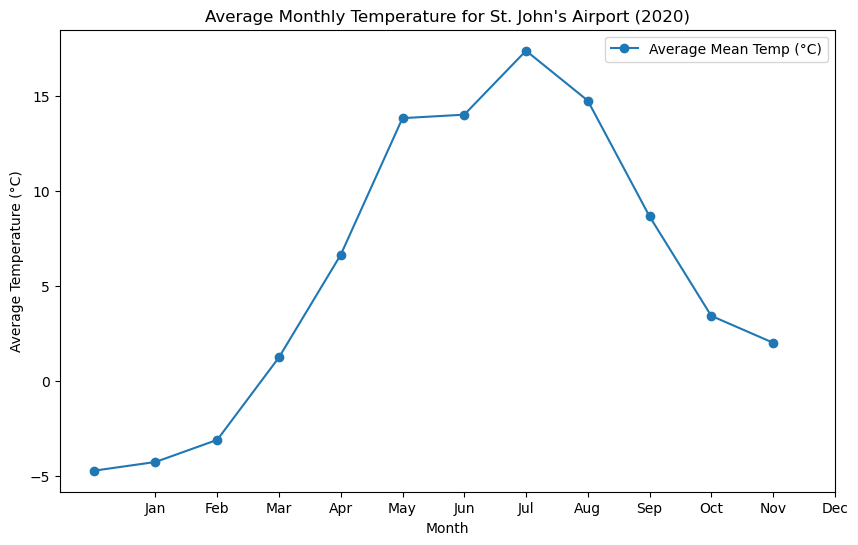

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_avg_temp['Mean Temp (C)'], 
    marker='o', 
    linestyle='-', 
    label="Average Mean Temp (°C)"
)
plt.title("Average Monthly Temperature for St. John's Airport (2020)")
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()

### Problem 4.2

* Plot the monthly temperature as in problem 4.1 but indicate total rainfall for the month by the adjusting the size of the circles for the data points to be proportional to rainfall.
    * This is similar to  problem 2.2, but use pandas operations to complete the data reduction.
    * Missing rainfall data can be replaced by zero; keep the record for its useful temperature data.
    * Use Pandas methods to reduce the data to the appropriate years
    * Use Pandas methods to sum the total rainfall for each month.
    * Plot the data, you can use a scatter plot if you prefer, since it will already have circular markers.
    * Add appropriate labels to the plot.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99657 entries, 0 to 99656
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Longitude (x)              99657 non-null  float64       
 1   Latitude (y)               99657 non-null  float64       
 2   Station Name               99657 non-null  object        
 3   Climate ID                 99657 non-null  object        
 4   Date/Time                  99657 non-null  datetime64[ns]
 5   Year                       99657 non-null  int64         
 6   Month                      99657 non-null  int64         
 7   Day                        99657 non-null  int64         
 8   Data Quality               0 non-null      float64       
 9   Max Temp (C)               89860 non-null  float64       
 10  Max Temp Flag              6292 non-null   object        
 11  Min Temp (C)               89834 non-null  float64       
 12  Min 

In [124]:
st_johns_2020['Total Rain (mm)'].fillna(0, inplace=True)

C:\Users\Mas85\AppData\Local\Temp\ipykernel_17852\369944086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  st_johns_2020['Total Rain (mm)'].fillna(0, inplace=True)


In [125]:
st_johns_2020['Total Rain (mm)'].isna().sum()

0

In [126]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [127]:
monthly_avg_temp = st_johns_2020.groupby('Month')['Mean Temp (C)'].mean().reset_index()

In [128]:
monthly_rainfall = st_johns_2020.groupby('Month')['Total Rain (mm)'].sum().reset_index()

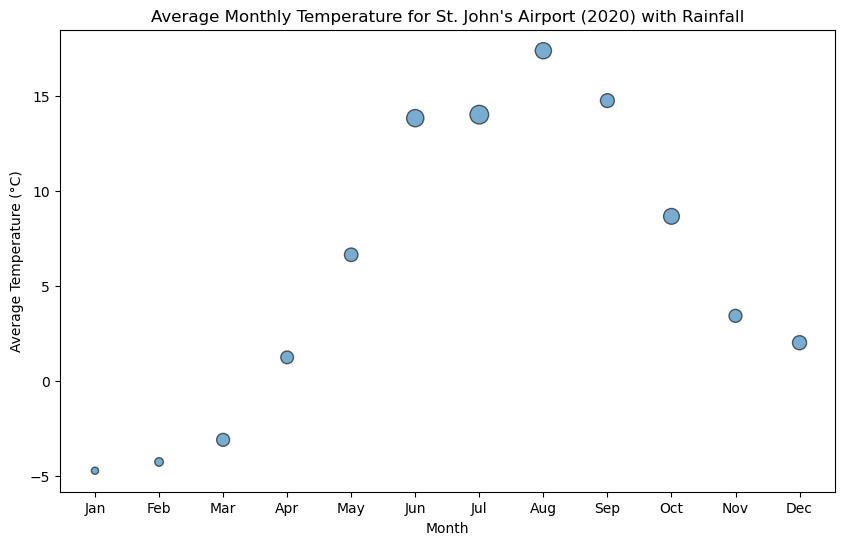

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(
    monthly_data['Month'], 
    monthly_avg_temp['Mean Temp (C)'], 
    monthly_rainfall['Total Rain (mm)'],
    alpha=0.6, 
    edgecolor='k'
)

plt.title("Average Monthly Temperature for St. John's Airport (2020) with Rainfall")
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |
| <https://www.w3schools.com/python/matplotlib_labels.asp> | Plot | taken sample code  |
|  Note 4 & 5 | Code sample  | taken Idea  |


# Submission

Submission mechanism I want for the course is not yet available. So for now, upload your soution *inclass4X.ipynb* file to the [Brightspace Assignment folder](https://online.mun.ca/d2l/lms/dropbox/user/folders_list.d2l?ou=603130&isprv=0).

Submission will close at 4 PM. Make sure to submit whatever you have completed at that time.
